# Análisis de las peticiones de gobierno abierto

Actualización: Feb. 6, 2019

En esta hoja de trabajo se realiza una análisis de la base de datos de peticiones tramitadas a través del portal Gobierno Abierto. Los datos son obtenidos del Portal de Datos Abiertos del Gobierno de El Salvador. Los están actualizados hasta Jun. 8, 2018.

In [18]:
# Carga de librerías
import pandas as pd
import matplotlib.pyplot as plt
import codecs
import numpy as np
from io import StringIO
%matplotlib inline

In [51]:
data = pd.read_csv('input/solicitudes.csv')

In [52]:
# Tamaño del dataset - observaciones x atributos
data.shape

(32913, 24)

In [53]:
# Atributos del dataset
data.columns

Index(['Siglas', 'Institución', 'Año de admisión', 'Fecha de admisión',
       'Correlativo', 'Nacionalidad', 'Nacionalidad.1', 'Residencia',
       'Tipo de persona', 'Edad', 'Sexo', 'Nivel educativo', 'Ocupación',
       'Forma de entrega', 'Departamento', 'Municipio',
       'Total de requerimientos', 'Detalle de requerimientos',
       'Información solicitada', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [59]:
# Peticiones por año y sexo
por_sexo = pd.crosstab(data['Año de admisión'].fillna('NA'), data['Sexo'].fillna('NA'))
# fig = por_sexo.plot(kind='bar').get_figure()
# fig.suptitle('Peticiones por sexo')
# fig.savefig('por-sexo.png')
por_sexo

Sexo,F,M
Año de admisión,,
2014.0,1762,2348
2015.0,3105,3071
2016.0,3915,3741
2017.0,5001,5003
2018.0,1168,1251
NA,1312,1236


In [8]:
por_sexo.to_excel('por-sexo.xlsx')
print('Detalle:\n', por_sexo)
print('Subtotales:\n', por_sexo.sum())
print('Total:\n', por_sexo.sum().sum())

Detalle:
 Sexo                F     M
Año de admisión            
2014.0           1762  2348
2015.0           3105  3071
2016.0           3915  3741
2017.0           5001  5003
2018.0           1168  1251
NA               1312  1236
Subtotales:
 Sexo
F    16263
M    16650
dtype: int64
Total:
 32913


In [60]:
# Peticiones por departamento y año
por_depto = pd.crosstab([data['Departamento'].fillna('NA'), data['Municipio'].fillna('NA')], data['Año de admisión'].apply(str).fillna('NA'))
por_depto.to_excel('por-depto.xlsx')
print('Detalle:\n', por_depto)
print('Subtotales:\n', por_depto.sum())
print('Total:\n', por_depto.sum().sum())

Detalle:
 Año de admisión                        2014.0  2015.0  2016.0  2017.0  2018.0  \
Departamento Municipio                                                          
Ahuachapán   Ahuachapán                     9      31      42      65       7   
             Apaneca                        0       0       2       3       2   
             Atiquizaya                     5       7       8      16       7   
             Concepción de Ataco            0       5       4       4       1   
             El Refugio                     1       2       0       3       0   
             Guaymango                      0       2       0       0       0   
             Jujutla                        0       1       2       5       0   
             San Francisco Menéndez         5       3       7       6       1   
             San Lorenzo                    1       5       4       3       3   
             San Pedro Puxtla               2       0       0       4       1   
             Tacub

In [10]:
# Peticiones por municipio
por_mun = pd.crosstab(data['Municipio'].fillna('NA'), data['Año de admisión'].apply(str).fillna('NA'))
por_mun.to_excel('por-municipio.xlsx')
print('Detalle:\n', por_mun)
print('Subtotales:\n', por_mun.sum())
print('Total:\n', por_mun.sum().sum())

Detalle:
 Año de admisión            2014.0  2015.0  2016.0  2017.0  2018.0  nan
Municipio                                                             
Acajutla                        7       5      11      11       3    4
Agua Caliente                   1       0       4       2       0    1
Aguilares                       7       9      13      16      14    4
Ahuachapán                      9      31      42      65       7   16
Alegría                         3       0       1       7       1    0
Anamorós                        1       2       0       0       0    0
Antiguo Cuscatlán             162     263     460     576     110  174
Apaneca                         0       0       2       3       2    1
Apastepeque                     4       4       7       9       2    2
Apopa                          82     114     120     143      54   21
Arcatao                         0       1       1       4       1    0
Armenia                         8      11      17      11       3  

In [11]:
# Por nivel educativo
data.loc[(data['Nivel educativo'] == 'No especificó su inf. académica'), 'Nivel educativo'] = 'NA'
data.loc[(data['Nivel educativo'] == 'no especificó'), 'Nivel educativo'] = 'NA'
data.loc[(data['Nivel educativo'] == 'Sin educación formal'), 'Nivel educativo'] = '0 - Sin educación formal'
data.loc[(data['Nivel educativo'] == 'Primaria (Hasta sexto grado)'), 'Nivel educativo'] = '1 - Primaria'
data.loc[(data['Nivel educativo'] == 'primaria'), 'Nivel educativo'] = '1 - Primaria'
data.loc[(data['Nivel educativo'] == 'Secundaria (Tercer ciclo)'), 'Nivel educativo'] = '2 - Secundaria'
data.loc[(data['Nivel educativo'] == 'secundaria'), 'Nivel educativo'] = '2 - Secundaria'
data.loc[(data['Nivel educativo'] == 'bachillerato'), 'Nivel educativo'] = '3 - Bachillerato'
data.loc[(data['Nivel educativo'] == 'Bachillerato'), 'Nivel educativo'] = '3 - Bachillerato'
data.loc[(data['Nivel educativo'] == 'Universitario'), 'Nivel educativo'] = '4 - Universitario'
data.loc[(data['Nivel educativo'] == 'universitario'), 'Nivel educativo'] = '4 - Universitario'
data.loc[(data['Nivel educativo'] == 'Postgrado'), 'Nivel educativo'] = '5 - Posgrado'
data.loc[(data['Nivel educativo'] == 'postgrado'), 'Nivel educativo'] = '5 - Posgrado'
por_educ = pd.crosstab(data['Nivel educativo'].fillna('NA'), data['Año de admisión'].apply(str).fillna('NA'))

Detalle:
 Año de admisión           2014.0  2015.0  2016.0  2017.0  2018.0   nan
Nivel educativo                                                       
0 - Sin educación formal       0       0       0      71      68     2
1 - Primaria                 154     267     170     409     178    19
2 - Secundaria               150     296     200     360     135    28
3 - Bachillerato             666     952     972    1371     377   404
4 - Universitario           2633    3853    4696    5464    1205  1572
5 - Posgrado                 310     512     898    1195     165   437
NA                           197     296     720    1134     291    86
Subtotales:
 Año de admisión
2014.0     4110
2015.0     6176
2016.0     7656
2017.0    10004
2018.0     2419
nan        2548
dtype: int64
Total:
 32913


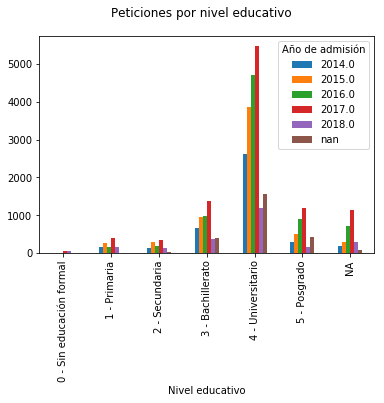

In [12]:
fig = por_educ.plot(kind='bar').get_figure()
fig.suptitle('Peticiones por nivel educativo')
fig.savefig('por-educ.png')
por_educ.to_excel('por-educ.xlsx')
print('Detalle:\n', por_educ)
print('Subtotales:\n', por_educ.sum())
print('Total:\n', por_educ.sum().sum())

In [13]:
# Por institución
por_inst = pd.crosstab(data['Institución'].fillna('NA'), data['Año de admisión'].apply(str).fillna('NA'))
por_inst.to_excel('por-institucion.xlsx')

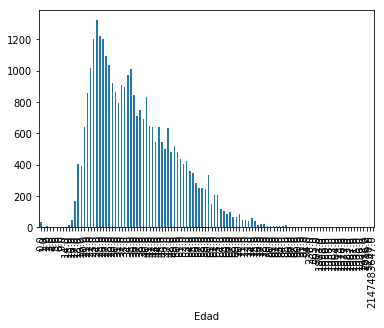

In [14]:
# Por edad
por_edad = data.groupby(['Edad'])['Edad'].count()
por_edad.to_excel('por-edad.xlsx')
por_edad.plot(kind='bar')

In [15]:
edades = [0, 18, 30, 45, 60,100]
freq = np.zeros(len(edades) - 1)
pos = 1
for idx in range(len(por_edad)):
    if pos > len(edades) - 2:
        break
    if idx >= edades[pos]:
        pos += 1
    freq[pos - 1] += por_edad.iloc[idx]
freq

array([ 4784., 12232.,  9432.,  4102.,    87.])

In [16]:
df = pd.DataFrame({'Frecuencia': freq}, index=['[0-18]', '[18-30]', '[30-45]', '[45-60]', '>60'])
df.to_excel('por-rango-edad.xlsx')

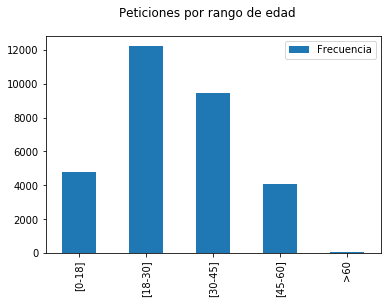

In [17]:
fig = df.plot(kind='bar').get_figure()
fig.suptitle('Peticiones por rango de edad')
fig.savefig('por-rango-edad.png')